Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string

In [2]:
import json 
import requests 
import pandas as pd 
import seaborn as sns 


In [3]:
Link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response=requests.get(Link)
data=json.loads(response.text)

In [4]:
data

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

In [5]:
episodes=data['_embedded']['episodes']
episodes

[{'id': 869671,
  'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original',
  'name': 'The Original',
  'season': 1,
  'number': 1,
  'type': 'regular',
  'airdate': '2016-10-02',
  'airtime': '21:00',
  'airstamp': '2016-10-03T01:00:00+00:00',
  'runtime': 68,
  'rating': {'average': 8},
  'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg',
   'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'},
  'summary': "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>",
  '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/869671'},
   'show': {'href': 'https://api.tvmaze.com/shows/1371'}}},
 {'id': 911201,
  'url':

In [6]:
pd.set_option("display.max_columns",None)
episode_df=pd.json_normalize(episodes)
episode_df.head(1)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,_links.self.href,_links.show.href
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,<p>A woman named Dolores is a free spirit in t...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371


In [7]:

count_values=episode_df.groupby(by='season')['rating.average'].count()
print(count_values)
sum_Ratings=episode_df.groupby(by='season')['rating.average'].sum()
print(sum_Ratings)

ratings_df=sum_Ratings//count_values
ratings_df


season
1    10
2    10
3     8
4     8
Name: rating.average, dtype: int64
season
1    80.9
2    80.0
3    62.2
4    60.3
Name: rating.average, dtype: float64


season
1    8.0
2    8.0
3    7.0
4    7.0
Name: rating.average, dtype: float64

In [8]:
ratings_df=ratings_df.reset_index()
ratings_df

,season,rating.average
0,1,8.0
1,2,8.0
2,3,7.0
3,4,7.0


<AxesSubplot:xlabel='season', ylabel='rating.average'>

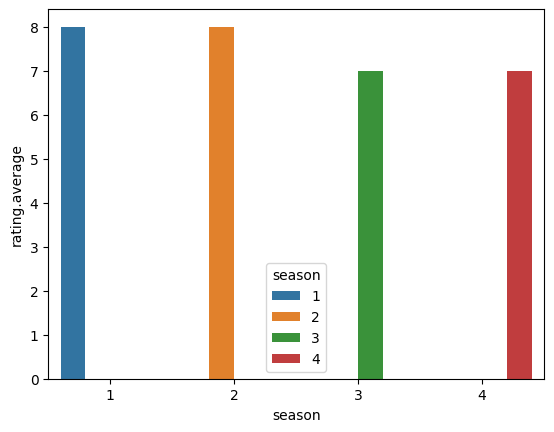

In [9]:
sns.barplot(x='season',y='rating.average',data=ratings_df, hue='season',)

### Get all the episode names, whose average rating is more than 8 for every season

In [92]:
episode_df[episode_df['rating.average']>8.0][['name','rating.average']]

,name,rating.average
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


### Get all the episode names that aired before May 2019

In [11]:
episode_df['airdate']=pd.to_datetime(episode_df['airdate'],format='%Y-%m-%d')
episode_df[episode_df['airdate']<='2019-05']['name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

#### datetime functions
episode_df['monthname']=episode_df['airdate'].dt.month_name()
episode_df['year']=episode_df['airdate'].dt.year
episode_df['month_number']=episode_df['airdate'].dt.month

#this approach is not taking into account complete 12 months of previous years 
episode_df[(episode_df['month_number']<5) & (episode_df['year']<2019)]['name']

### Get the episode name from each season with the highest and lowest rating

In [33]:
#this is returning a column having min and max values per season.
episode_df['highest_rating']=episode_df.groupby(by='season')['rating.average'].transform('max')
episode_df['lowest_rating']=episode_df.groupby(by='season')['rating.average'].transform('min')

In [34]:
#this is returning all the recrods with their respective highest and lowest rating 
episode_name_ratings=episode_df.groupby('season')[['name','rating.average','highest_rating','lowest_rating']].value_counts()
episode_name_ratings

season  name                       rating.average  highest_rating  lowest_rating
1       Chestnut                   7.7             8.7             7.6              1
        Contrapasso                8.0             8.7             7.6              1
        Trace Decay                7.9             8.7             7.6              1
        Dissonance Theory          7.9             8.7             7.6              1
        The Adversary              8.0             8.7             7.6              1
        The Bicameral Mind         8.7             8.7             7.6              1
        The Original               8.0             8.7             7.6              1
        The Stray                  7.6             8.7             7.6              1
        The Well-Tempered Clavier  8.5             8.7             7.6              1
        Trompe L'Oeil              8.6             8.7             7.6              1
2       Virtù e Fortuna            7.7             8.7     

In [71]:
#it is returning just one record having min rating, there could be many more records also
lowest_rating_df=episode_df.groupby(by='season').agg({'rating.average':'min','name':'first','summary':'first'}).reset_index()
lowest_rating_df


,season,rating.average,name,summary
0,1,7.6,The Original,<p>A woman named Dolores is a free spirit in t...
1,2,7.6,Journey Into Night,"<p>In the aftermath of the host rebellion, the..."
2,3,7.5,Parce Domine,"<p>If you're stuck in a loop, try walking in a..."
3,4,7.1,The Auguries,<p>Hello again. Don't worry about a thing. It'...


In [72]:
#this is also returning only one record having max value, there can be many more records
highest_rating_df=episode_df.groupby(by='season').max(['rating.average']).reset_index()
highest_rating_df

,season,id,number,runtime,rating.average,highest_rating,lowest_rating
0,1,943067,10,90,8.7,8.7,7.6
1,2,1459961,10,90,8.7,8.7,7.6
2,3,1829375,8,75,8.0,8.0,7.5
3,4,2326661,8,60,7.8,7.8,7.1


### Get the episode name from each season with the highest and lowest rating

In [77]:
min_rating = episode_df.groupby(by='season')['rating.average'].min()
low_rating_df=episode_df[episode_df['rating.average'].isin(min_rating)].sort_values(by='season')[['name','season','rating.average']]
low_rating_df

,name,season,rating.average
2,The Stray,1,7.6
14,Akane No Mai,2,7.6
25,Decoherence,3,7.5
26,Passed Pawn,3,7.5
28,The Auguries,4,7.1
30,Années Folles,4,7.6
33,Fidelity,4,7.5
35,"Que Será, Será",4,7.5


In [93]:
max_rating=episode_df.groupby(by='season')['rating.average'].max()
max_rating

season
1    8.7
2    8.7
3    8.0
4    7.8
Name: rating.average, dtype: float64

#approach :
* check for the max rating per season and then return all the values of that season. 
* a lookup approach , check season, max rating and give the answer 



In [79]:
max_rating_df=episode_df[episode_df['rating.average'].isin(max_rating)].sort_values(by='season')[['name','season','rating.average']]
max_rating_df

,name,season,rating.average
0,The Original,1,8.0
4,Contrapasso,1,8.0
5,The Adversary,1,8.0
9,The Bicameral Mind,1,8.7
10,Journey Into Night,2,7.8
13,The Riddle of the Sphinx,2,8.0
17,Kiksuya,2,8.7
20,Parce Domine,3,8.0
21,The Winter Line,3,7.8
22,The Absence of Field,3,7.8


In [85]:
episode_wth_rating=pd.merge(max_rating_df,low_rating_df, how='outer').sort_values(by='season')
episode_wth_rating

,name,season,rating.average
0,The Original,1,8.0
1,Contrapasso,1,8.0
2,The Adversary,1,8.0
3,The Bicameral Mind,1,8.7
12,The Stray,1,7.6
4,Journey Into Night,2,7.8
5,The Riddle of the Sphinx,2,8.0
6,Kiksuya,2,8.7
13,Akane No Mai,2,7.6
15,Passed Pawn,3,7.5


#### Get the summary for the most popular ( ratings ) episode in every season

In [95]:
max_rating=episode_df.groupby(by='season')['rating.average'].max()
#max_rating_per_season = max_rating.idxmax()

max_rating_episode_df=episode_df[episode_df['rating.average'].isin(max_rating)].sort_values(by='season')[['name','season','rating.average','summary']]
max_rating_episode_df

,name,season,rating.average,summary
0,The Original,1,8.0,"<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>"
4,Contrapasso,1,8.0,"<p>Dolores takes the first step on her path of discovery by deciding to write a new story for herself... where she isn't the damsel. Meanwhile, Elise discovers the Woodcutter's secret, and Robert pays the Man a visit.</p>"
5,The Adversary,1,8.0,"<p>While Maeve convinces Felix to show her ""upstairs,"" Teddy and the Man close in on the maze. Meanwhile, Bernard and Elsie close in on the identity of the person who is stealing secrets from the park, while Lee meets with a Delos executive director.</p>"
9,The Bicameral Mind,1,8.7,"<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>"
10,Journey Into Night,2,7.8,"<p>In the aftermath of the host rebellion, the rescue team finds Bernard and the new Head of Operations asks for his help. Meanwhile, Delores promises to show Teddy the truth, and Maeve convinces Lee and Hector to help her find her daughter.</p>"
13,The Riddle of the Sphinx,2,8.0,"<p>William pays his recuperating father-in-law several visits. Meanwhile, the Man continues to play Robert's game, and Bernard remembers some of his missing time.</p>"
17,Kiksuya,2,8.7,"<p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>"
20,Parce Domine,3,8.0,"<p>If you're stuck in a loop, try walking in a straight line.</p>"
21,The Winter Line,3,7.8,<p>People put up a lot of walls. Bring a sledgehammer to your life.</p>
22,The Absence of Field,3,7.8,"<p>If you don't like what you see in the mirror, don't blame the mirror.</p>"


In [87]:
from bs4 import BeautifulSoup


In [88]:
def remove_html_tags(dfcolumn):
    soup=BeautifulSoup(dfcolumn,"html.parser")
    cleaned_text=soup.get_text()
    return cleaned_text

max_rating_episode_df['summary']=max_rating_episode_df['summary'].apply(remove_html_tags)

In [90]:
pd.set_option("display.max_colwidth",None)
max_rating_episode_df

,name,season,rating.average,summary
0,The Original,1,8.0,"A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate."
4,Contrapasso,1,8.0,"Dolores takes the first step on her path of discovery by deciding to write a new story for herself... where she isn't the damsel. Meanwhile, Elise discovers the Woodcutter's secret, and Robert pays the Man a visit."
5,The Adversary,1,8.0,"While Maeve convinces Felix to show her ""upstairs,"" Teddy and the Man close in on the maze. Meanwhile, Bernard and Elsie close in on the identity of the person who is stealing secrets from the park, while Lee meets with a Delos executive director."
9,The Bicameral Mind,1,8.7,"Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative."
10,Journey Into Night,2,7.8,"In the aftermath of the host rebellion, the rescue team finds Bernard and the new Head of Operations asks for his help. Meanwhile, Delores promises to show Teddy the truth, and Maeve convinces Lee and Hector to help her find her daughter."
13,The Riddle of the Sphinx,2,8.0,"William pays his recuperating father-in-law several visits. Meanwhile, the Man continues to play Robert's game, and Bernard remembers some of his missing time."
17,Kiksuya,2,8.7,"Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering."
20,Parce Domine,3,8.0,"If you're stuck in a loop, try walking in a straight line."
21,The Winter Line,3,7.8,People put up a lot of walls. Bring a sledgehammer to your life.
22,The Absence of Field,3,7.8,"If you don't like what you see in the mirror, don't blame the mirror."
